In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df2= pd.read_excel('Food_Establishment_Inspection_Data.xlsx',sheet_name='main')

In [3]:
df2=pd.read_csv('cleaned_dataset_V1.csv')
df2.head(2)

,Name,Inspection Date,Description,City,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Grade,Category
0,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,5,1.0,3
1,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,5,1.0,3


In [4]:
df=df2.loc[:, ['Inspection Score','Inspection Result','Violation Description' , 'Violation Points']]
len(pd.unique(df['Violation Description']))
df.dropna(inplace=True)

df.head(2)

KeyError: "['Violation Description'] not in index"

In [ ]:
df["a"] = pd.to_(df['Violation Description'])
df

In [ ]:
# dfe = df.explode('Violation Description')
# df['Violation Description']=df['Violation Description'].map(str)
df = df.astype({'Violation Description':'string'})

df['code']=df['Violation Description'].apply(lambda x: x[0:4])
df.info()
df.dropna(inplace=True)
print(df.sort_values(by='code'))
print(df.isna())

In [88]:
# df3=df.groupby(by='Violation Description',as_index=False).size().sort_values(by='size', ascending=False)
# df3
df['code'].isna().sum()

0

In [89]:
df2=df.groupby(by='code',as_index=False,dropna=False).size().sort_values(by='size', ascending=False)
df2.head()

,code,size
34,3400,1292
4,0600,1018
20,2110,912
41,4100,779
21,2120,708


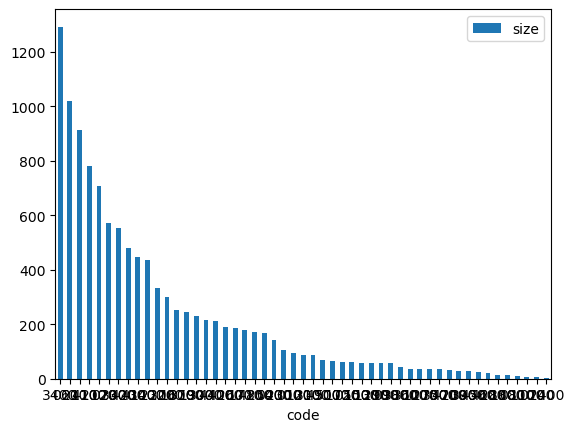

In [90]:
# plt.hist(df['Violation Description'])
# plt.hist(df2)
# plt.show()
ax = df2.plot.bar(x='code', y='size', rot=0)